In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Updated Label3.xlsx')

In [ ]:
df2=df.dropna()

In [ ]:
df2.to_csv('Best Label.csv')

In [ ]:
from google.colab import files
files.download('Best Label.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import re
import string
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
y = df2['Label']
X_train, X_val, y_train, y_val = train_test_split(df2['Lemma'], y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

In [ ]:
batch_size = 1000
X_train_batches = [X_train[i:i+batch_size] for i in range(0, X_train.shape[0], batch_size)]
y_train_batches = [y_train[i:i+batch_size] for i in range(0, y_train.shape[0], batch_size)]

In [ ]:
#dt = DecisionTreeClassifier(max_depth= 7, min_samples_leaf= 3, min_samples_split= 2)
rf = RandomForestClassifier(n_estimators=500,min_samples_split= 2, random_state=42)
#from sklearn.ensemble import  VotingClassifier
#ensemble = VotingClassifier([ ('dt', dt),('rf',rf)], voting='hard')

In [ ]:
for i in range(len(X_train_batches)):
    rf.fit(X_train_batches[i], y_train_batches[i])

In [ ]:
y_pred = rf.predict(X_val)
print(f"Batch {i+1} classification report:")
print(classification_report(y_val, y_pred))

Batch 77 classification report:
              precision    recall  f1-score   support

       False       0.55      0.51      0.53     15442
        True       0.59      0.63      0.61     17419

    accuracy                           0.57     32861
   macro avg       0.57      0.57      0.57     32861
weighted avg       0.57      0.57      0.57     32861



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(rf, X_train_batches[i],  y_train_batches[i], cv=kfold, scoring='accuracy')

In [ ]:
average_accuracy = scores.mean()

In [ ]:
average_accuracy

0.5822534766118838

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_val,y_pred)

In [ ]:
labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

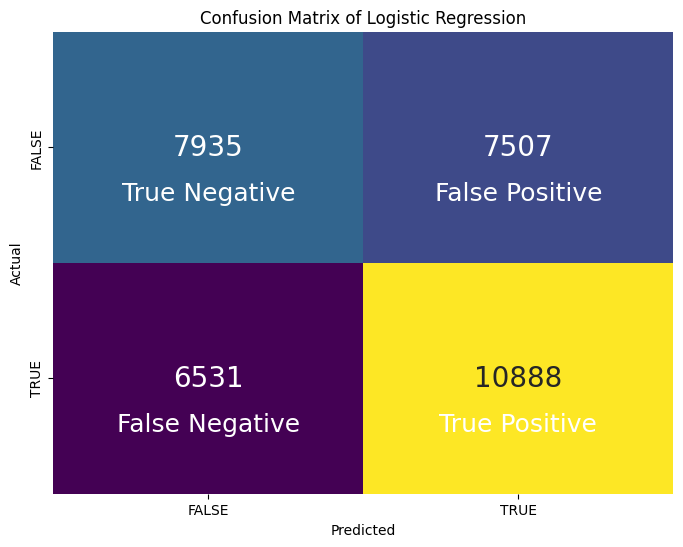

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="viridis", fmt="d", cbar=False,
            xticklabels=['FALSE', 'TRUE'],
            yticklabels=['FALSE', 'TRUE'],annot_kws={"size": 20})
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.7, labels[i][j], ha='center', va='center', fontsize=18, color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [ ]:
from sklearn.calibration import calibration_curve
true_prob, pred_prob = calibration_curve(y_val,y_pred, n_bins=10)

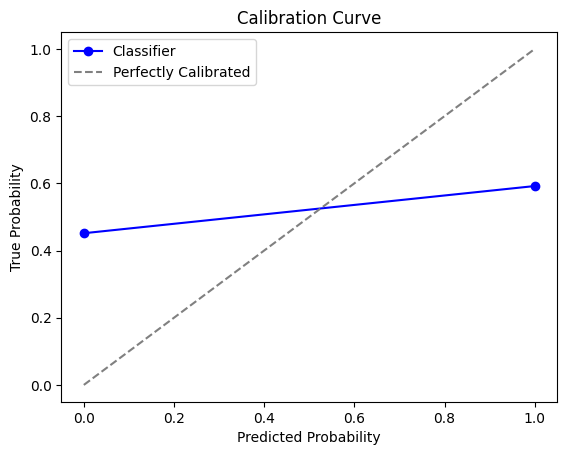

In [ ]:
plt.plot(pred_prob, true_prob, marker='o', linestyle='-', color='blue', label='Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

In [ ]:
df4=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [ ]:
df7=df4[['Lemma','clusters']]

In [ ]:
df7 = df7.rename(columns={'clusters': 'Label'})

In [ ]:
X_test = df7['Lemma']
X_test_transformed = vectorizer.transform(X_test)
y_pred_test = rf.predict(X_test_transformed)

In [ ]:
y_true=df7['Label']

In [ ]:
print(classification_report(y_true, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       880
           1       0.87      1.00      0.93      5765

    accuracy                           0.87      6645
   macro avg       0.43      0.50      0.46      6645
weighted avg       0.75      0.87      0.81      6645



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


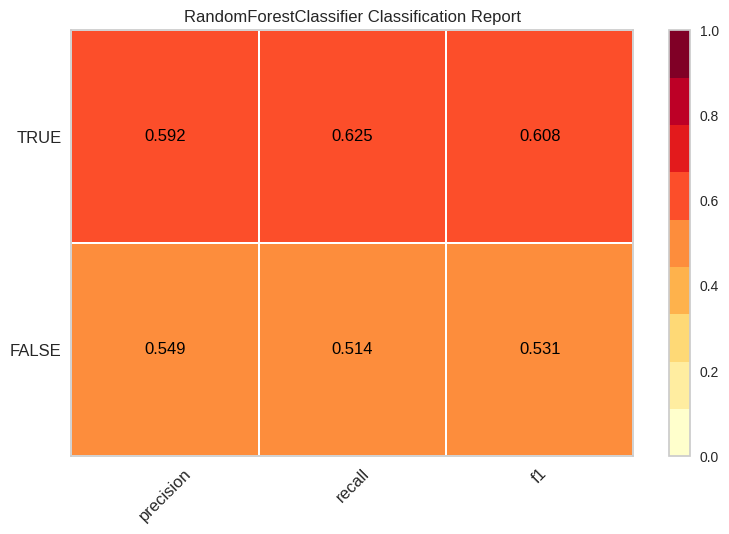

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf, classes=['FALSE', 'TRUE'])
visualizer.fit(X_train_batches[i], y_train_batches[i])
visualizer.score(X_val, y_val)
visualizer.show()

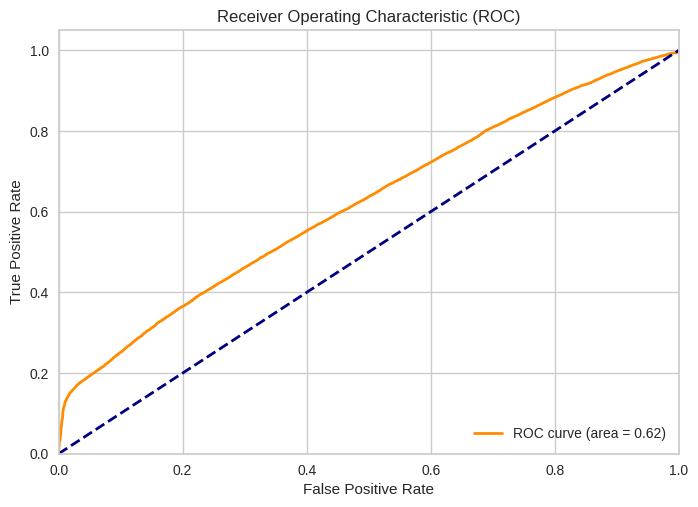

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


probas = rf.predict_proba(X_val)[:, 1]


fpr, tpr, thresholds = roc_curve(y_val, probas)


roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

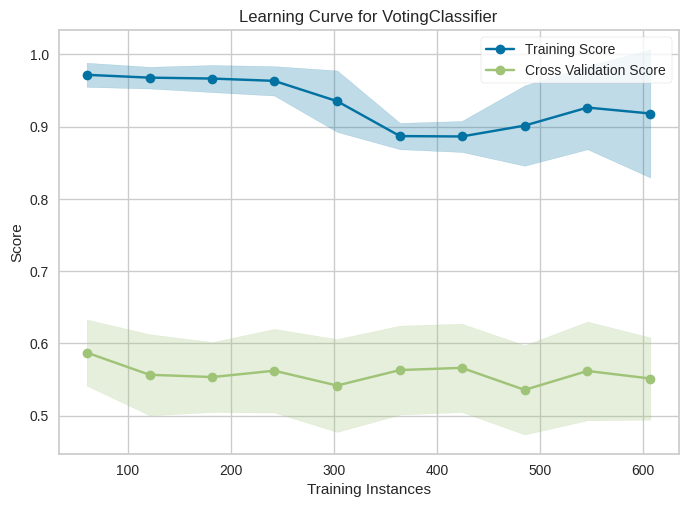

<Axes: title={'center': 'Learning Curve for VotingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

lc_viz = LearningCurve(
    rf, cv=cv, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

lc_viz.fit(X_train_batches[i], y_train_batches[i])
lc_viz.show()